In [3]:
import numpy as np
import matplotlib.pyplot as plt
import OctopusTools.Basic as cx

# 2022.05. Week  2 


# 1.Au metal bulk, expect to get the third order nonlinearities $n_2, \alpha_2, \chi^3$.

Use gauge vector field $A(t) = A_0 \cdot cos(\omega t + \frac{\pi}{2})$ laser pulse incident the Au bulk, with different  amplitudes <mark>$A_0 = 1,10,20,30,40  [Ha]$ <mark>
    

The calculatino path is:   <mark>/beegfs/ya48xos/Au/2022/Amplitude/A*<mark>  

scp -r 630nm chen@10.140.112.252:/data117/chen/jupyter/2nonlinearity/au/

### Parameters

spacing = 0.2 Bohr

k-sampling : $20\times20\times20$

Photon energy 1.968ev, wavelength $\lambda = 630 nm$.

Polarization direction: $\hat{e_x}$

External laser field shape: $A(t) = A_0 \cdot cos(\omega t + \frac{\pi}{2})$

TDPropagator : aetrs

TDTimeStep : 0.05 [a.u.] = 0.00121 [fs]

TDExponentialMethod :16th-lanczos

TDPropagationTime : 300 [a.u.] = 7.257 [fs]


In [2]:
path = "/data117/chen/jupyter/2nonlinearity/au/"
fs = 14
plt.figure(figsize = (12,5)) 

for a in [10,20,30,40]:
    time_ext, A_ext = cx.ReadData(path + "630nm/A%s/laser" % a ,1,2)
    time_ind, A_ind = cx.ReadData(path + "630nm/A%s/gauge_field" % a,1,2)   
    E_ext = cx.A2E(time_ext, A_ext)   # V/Angstrom
    E_ind = cx.A2E(time_ind, A_ind)
    
    plt.subplot(1,2,1)
    plt.plot(time_ext, A_ext,color = "blue", label = "Ext")
    plt.plot(time_ind, A_ind,color = "red", label= "Ind")
    plt.legend(fontsize = fs, loc = 1)
    plt.xlabel("Propagation time t [$\hbar/Ha$]", fontsize = fs)
    plt.ylabel("Gauge field A [$Ha$]", fontsize = fs)
        
    plt.subplot(1,2,2)
    plt.plot(time_ext * 0.02419, E_ext, color = "blue")
    plt.plot(time_ind * 0.02419, E_ind, color = "red")
#     plt.legend(fontsize = fs, loc = 1)
    plt.xlabel("Propagation time t [$fs$]", fontsize = fs)
    plt.ylabel("Electric field E [$V/\mathring{A}$]", fontsize = fs)
    

# plt.title("Blue(External laser), Red(Induced gauge)", fontsize = fs)       
plt.show()

FileNotFoundError: /data117/chen/jupyter/2nonlinearity/au/630nm/A10/laser not found.

<Figure size 864x360 with 0 Axes>

\begin{equation}
\begin{split}
    \frac{1}{\epsilon(\omega)} &= \frac{FT\{A_{tot}\}}{FT\{A_{ext}\}}  = \frac{FT\{A_{ext} + A_{ind}\}}{FT\{A_{ext}\}} \\
    &=  1 + \frac{\int^{T}_{0_+} e^{i\omega t - \eta t} \frac{-dA{ind}(t)}{dt} dt}{\int^{T}_{0_+} e^{i\omega t - \eta t} \frac{-dA_{ext}(t)}{dt} dt} 
    \label{key}
\end{split}
\end{equation}
    
    
\begin{equation}
    N(\omega) = n(\omega) + i \kappa(\omega)   
\end{equation}

    
\begin{equation}
    \epsilon(\omega) = \epsilon_1 + i \epsilon_2   
\end{equation}
    
    
\begin{equation}
    n^2(\omega) = \frac{\epsilon_{1}}{2} [sgn(\epsilon_{1}) \sqrt{1+(\epsilon_{2} / \epsilon_{1})^2}+1] 
\end{equation}

\begin{equation}
    \kappa^2(\omega) = \frac{\epsilon_{1}}{2} [sgn(\epsilon_{1}) \sqrt{1+(\epsilon_{2} / \epsilon_{1})^2}-1] 
\end{equation}  


if the system showing a not negligible absorption($\alpha_0 !\approx 0$) 


\begin{equation}
    \chi_{R}^{(3)} = (4n_0\epsilon_0c/3)(n_0n_2-k_0k_2)
\end{equation}


\begin{equation}
    \chi_{I}^{(3)} = (4n_0\epsilon_0c/3)(n_0k_0 + k_0n_2)
\end{equation}


\begin{equation}
    n = n_0 + \Delta n = n_0 + n_2 I 
\end{equation}

\begin{equation}
    \kappa = \kappa_0 + \Delta \kappa = \kappa_0 + \kappa_2 I 
\end{equation}

\begin{equation}
    N = n_0 + n_2 I + i (\kappa_0 + \kappa_2 I) 
\end{equation}


\begin{equation}
    N = n_0 + n_2 I + i \lambda (\alpha_0 + \alpha_2 I)
\end{equation}


In [28]:
# extract the modified I and  real,imaginary part of n.
def nIcurve(time):
    
    path = "/data117/chen/jupyter/2nonlinearity/au/"
    Eta = 0  # [Ha/hbar]
    wavelength = 630 # [nm]
    omega = cx.Wavelength2Omega(wavelength) * cx.timeau2s  # [1/s] --> 1 / [hbar/Ha]
    I =  []
    n = []
    n_im = []
    e0 = cx.Vaccum_permitivity   #[F/m]
    n0 = 3.18
    ##########################################################################################
#     for a in [1,10,15,20,25,30,33,37,40]:
    for a in [10,15,20,25,30,33,37,40]:
        time_ext, A_ext = cx.ReadData(path + "630nm/A%s/laser" % a ,1,2)
        time_ind, A_ind = cx.ReadData(path + "630nm/A%s/gauge_field" % a,1,2)
        
        start = 0
        end = int(time/0.05)
        
        time_ext, A_ext = cx.shortten(time_ext, A_ext ,start,end)
        time_ind, A_ind = cx.shortten(time_ind, A_ind ,start,end)
              
        dAdt_ext = cx.dA_over_dt(time_ext, A_ext)
        dAdt_ind = cx.dA_over_dt(time_ind, A_ind)

        ext_real, ext_imag = cx.FT(time_ext, dAdt_ext,Eta,omega)
        ind_real, ind_imag = cx.FT(time_ind, dAdt_ind,Eta,omega)
        
        Denominator = np.square(ind_real + ext_real) + np.square(ind_imag + ext_imag)
        epsilon_real = (ext_real * (ind_real + ext_real) + ext_imag * (ind_imag + ext_imag)) / Denominator
        epsilon_imag = (ind_real * ext_imag - ext_real * ind_imag) / Denominator

        n_real, n_imag = cx.refractive_index(epsilon_real, epsilon_imag)

        modification =  epsilon_real
#         modification = np.sqrt(np.square(epsilon_real) + np.square(epsilon_imag))
        Emax = max(cx.A2E(time_ext, A_ext)) / modification  # epsilon modification
#         I_mod = cx.E2I(Emax, n_real)  # [W/cm^2]
        I_mod = cx.E2I(Emax, n_real) * 4  # [W/cm^2]  # cited from the 'n0n2k0k2' paper

    
        I.append(I_mod)
        n.append(n_real)
        n_im.append(n_imag)

#         print("I is %.2e W/cm^2,  epsilon_real is %.4f, epsilon_imag is %.4f,  n_real is %.6f, n_imag is %.6f  "
#               % (I_mod, epsilon_real, epsilon_imag, n_real, n_imag))

    return(I, n,n_im)

In [29]:
#### N-th order polynomial fitting  ##################################
def nfit(x,y,n):
    
    x = np.array(x)
    fitting = np.polyfit(x,y,n)
    parameters = np.poly1d(fitting)
    fitted_y = 0
    for i in range(n+1):
        fitted_y += np.power(x,i) * parameters[i]
        
    return (fitted_y, parameters)

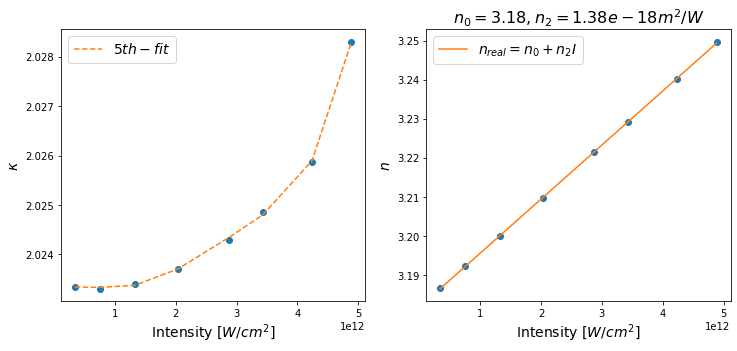

In [44]:
time = 300
I, n, n_im  = nIcurve(time)
#### real part linear fitting  ############
fitted_yr, pr = nfit(I, n, 1)
#### imaginary part polnomial fitting ########
fitting_order = 5
fitted_y1, p1 = nfit(I, n_im, fitting_order)
###########################################
fs = 14
plt.figure(figsize = (12,5))  


with open('time%s' % time, 'w') as f:
    f.write("###Intensity [W/cm^2]    n              k          {time = %s [hbar/Ha]}  \n" %  time )
    for i in range(len(I)):
        f.write('%.4e             %.4e     %.4e  \n' % (I[i], n[i], n_im[i]))

plt.subplot(1,2,1)
plt.plot(I, n_im, "o")
plt.plot(I, fitted_y1,'--', label = "$%sth-fit$" % fitting_order)
plt.xlabel("Intensity [$W/cm^2$]",fontsize = fs)
plt.ylabel("$\kappa$",fontsize = fs)
plt.legend(fontsize = fs, loc = 2)



plt.subplot(1, 2, 2)
plt.plot(I, n, "o")
plt.plot(I, fitted_yr, label = "$n_{real} = n_0 + n_2 I$")
plt.xlabel("Intensity [$W/cm^2$]",fontsize = fs)
plt.ylabel("$n$",fontsize = fs)
plt.title("$n_0 = %.2f , n_2 = %.2e m^2/W$" % (pr[0], pr[1] * 1E-4), fontsize=fs + 2)
plt.legend(fontsize = fs, loc = 2)
plt.show()

k0 = 2.0223, k2 = 9.44e-20 m^2/W 

k0 = 2.0237, k2 = -8.10e-20 m^2/W 

k0 = 2.0231, k2 = 6.73e-20 m^2/W 

k0 = 2.0238, k2 = -1.73e-19 m^2/W 

k0 = 2.0232, k2 = 6.62e-20 m^2/W 

k0 = 2.0237, k2 = -1.85e-19 m^2/W 

k0 = 2.0233, k2 = 4.11e-20 m^2/W 

k0 = 2.0234, k2 = -1.03e-20 m^2/W 

k0 = 2.0235, k2 = -3.31e-20 m^2/W 

k0 = 2.0235, k2 = -4.41e-20 m^2/W 

k0 = 2.0235, k2 = -4.96e-20 m^2/W 

k0 = 2.0235, k2 = -5.26e-20 m^2/W 

k0 = 2.0235, k2 = -5.26e-20 m^2/W 

k0 = 2.0235, k2 = -5.26e-20 m^2/W 

k0 = 2.0235, k2 = -5.26e-20 m^2/W 

k0 = 2.0235, k2 = -5.26e-20 m^2/W 

k0 = 2.0235, k2 = -5.26e-20 m^2/W 

k0 = 2.0235, k2 = -5.26e-20 m^2/W 

k0 = 2.0235, k2 = -5.26e-20 m^2/W 



/tmp/ipykernel_4764/415811168.py:9: RankWarning: Polyfit may be poorly conditioned
  fitted_y, p = nfit(I, n_im, nn)
/tmp/ipykernel_4764/415811168.py:9: RankWarning: Polyfit may be poorly conditioned
  fitted_y, p = nfit(I, n_im, nn)
/tmp/ipykernel_4764/415811168.py:9: RankWarning: Polyfit may be poorly conditioned
  fitted_y, p = nfit(I, n_im, nn)
/tmp/ipykernel_4764/415811168.py:9: RankWarning: Polyfit may be poorly conditioned
  fitted_y, p = nfit(I, n_im, nn)
/tmp/ipykernel_4764/415811168.py:9: RankWarning: Polyfit may be poorly conditioned
  fitted_y, p = nfit(I, n_im, nn)
/data117/chen/anaconda3/envs/jupyter/lib/python3.10/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/tmp/ipykernel_4764/415811168.py:9: RankWarning: Polyfit may be poorly conditioned
  fitted_y, p = nfit(I, n_im, nn)
/tmp/ipykernel_4764/415811168.py:9: RankWarning: Polyfit may be poorly conditioned
  fitted_y, p = nfit(I, n_im, 

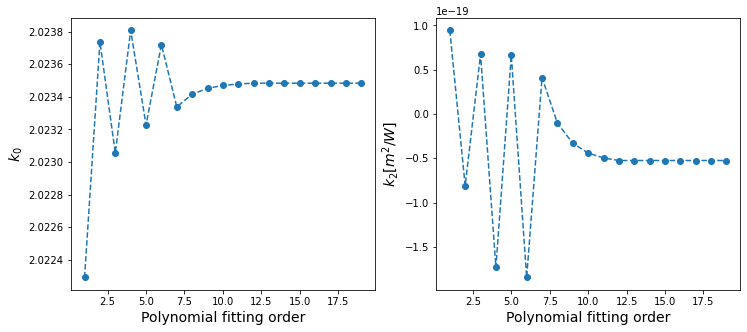

In [45]:
############  k2 ###################
I, n, n_im  = nIcurve(300)
k0 = []
k2 = []
fs = 14
fitrange = range(1,20)
plt.figure(figsize = (12,5))  
for nn in fitrange:
    fitted_y, p = nfit(I, n_im, nn)
    kappa0 = p[0]
    kappa2 = p[1]*1E-4
    k0.append(kappa0)
    k2.append(kappa2)
    print("k0 = %.4f, k2 = %.2e m^2/W \n" % (kappa0, kappa2))
    
plt.subplot(1,2,1)
plt.plot(fitrange, k0, "--o")
plt.xlabel("Polynomial fitting order",fontsize = fs)
plt.ylabel("$k_0$",fontsize = fs)

plt.subplot(1,2,2)
plt.plot(fitrange, k2, "--o")
plt.xlabel("Polynomial fitting order",fontsize = fs)
plt.ylabel("$k_2 [m^2/W]$",fontsize = fs)
plt.show()

$n_0 = 3.18, n_2 = 5.44 \times 10^{-18} m^2/W$

$k0 = 2.0235, k2 = -5.26e-20 m^2/W $

\begin{equation}
    \chi_{R}^{(3)} = (4n_0\epsilon_0c/3)(n_0n_2-k_0k_2)   \  [\frac{m^2}{V^2}]
\end{equation} 


\begin{equation}
    \chi_{I}^{(3)} = (4n_0\epsilon_0c/3)(n_0k_0 + k_0n_2) \  [\frac{m^2}{V^2}]
\end{equation}

Unit 
\begin{equation}
F = \frac{W \cdot s}{V^2}
\end{equation}

In [49]:
e0 = cx.Vaccum_permitivity   #[F/m]
c = cx.Light_speed   # [m/s]
fitting_order = 5
def diff_time(time):
    I, n, n_im  = nIcurve(time)
    fitted_yr, pr = nfit(I, n, 1)
    fitted_yi, pi = nfit(I, n_im, fitting_order)
    n0 = pr[0]
    n2 = pr[1]*1E-4
    k0 =  pi[0]
    k2 = pi[1]*1E-4
    
    chi3r = (4 * n0 * e0 * c / 3) * (n0*n2 - k0*k2)
    chi3i = (4 * n0 * e0 * c / 3) * (n0*k2 + k0*n2)
    
    return(chi3r,chi3i,n0,n2,k0,k2)

T = np.arange(100,300,10)
real =[]
imag = []
fs = 12
file = open("TDDFT630fit%s.txt" % fitting_order,"w+")
print("##pulse duration [s],  chi3r [m^2/V^2],  chi3i [m^2/V^2]      n0      n2[m^2/W]      k0         k2 [m^2/W] \n ")
file.write("##pulse duration [s],  chi3r [m^2/V^2],  chi3i [m^2/V^2]      n0      n2[m^2/W]      k0         k2 [m^2/W] \n ")
for i in T:
    chi3r,chi3i, n0,n2,k0,k2 = diff_time(i)
    real.append(chi3r)
    imag.append(chi3i)
    file.write("%.4e           %.4e         %.4e       %.4f    %.4e   %.4f    %.4e\n"  % (i * 0.02419 * 1E-15,chi3r,chi3i,n0,n2,k0,k2) )
    print("%.4e           %.4e         %.4e       %.4f    %.4e   %.4f    %.4e\n"  % (i * 0.02419 * 1E-15,chi3r,chi3i,n0,n2,k0,k2) )
file.close()

##pulse duration [s],  chi3r [m^2/V^2],  chi3i [m^2/V^2]      n0      n2[m^2/W]      k0         k2 [m^2/W] 
 
2.4190e-15           1.2485e-20         1.4392e-20       3.1951    4.1974e-19   2.2189    1.0684e-19

2.6609e-15           1.2877e-20         1.7532e-20       3.1263    4.9013e-19   2.1280    1.7320e-19

2.9028e-15           1.4904e-20         1.7951e-20       3.0973    5.4351e-19   2.1575    1.5010e-19

3.1447e-15           1.9602e-20         2.0085e-20       3.1539    6.4402e-19   2.1745    1.2649e-19

3.3866e-15           2.3592e-20         2.3868e-20       3.1992    7.5587e-19   2.1210    1.5778e-19

3.6285e-15           2.4567e-20         2.6252e-20       3.1792    8.1790e-19   2.0697    2.0140e-19

3.8704e-15           2.5845e-20         2.7277e-20       3.1550    8.6785e-19   2.0716    2.0444e-19

4.1123e-15           2.9089e-20         2.8081e-20       3.1691    9.3400e-19   2.0837    1.7587e-19

4.3542e-15           3.2632e-20         2.8829e-20       3.1925    1.0018e

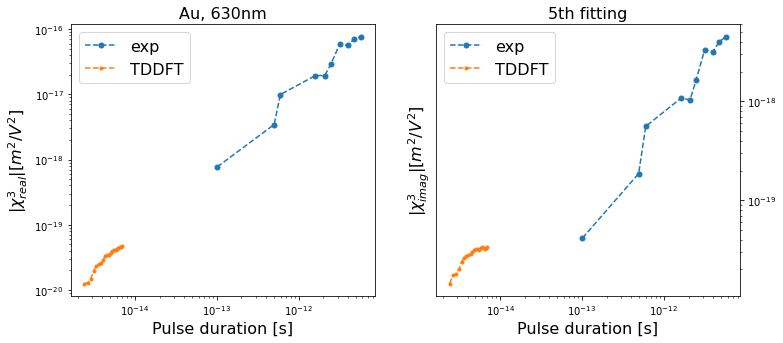

In [51]:
rotenberg = np.loadtxt("./Rotenberg630real.txt", delimiter=',')
rotenbergimag = np.loadtxt("./Rotenberg630imag.txt", delimiter=',')
octopus = np.loadtxt("./TDDFT630.txt")
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.loglog(rotenberg[:,0], rotenberg[:,1],"--o", label = "exp", markersize = 5)
plt.loglog(octopus[:,0], octopus[:,1],"--o", label = "TDDFT", markersize = 3)
fs=  16
plt.xlabel("Pulse duration [s]",fontsize = fs)
plt.ylabel("$|\chi^3_{real}| [m^2/V^2]$",fontsize = fs)
plt.title("Au, 630nm", fontsize=fs)
plt.legend(fontsize = fs)

plt.subplot(1,2,2)
plt.loglog(rotenbergimag[:,0], rotenbergimag[:,1],"--o", label = "exp", markersize = 5)
plt.loglog(octopus[:,0], np.abs(octopus[:,2]),"--o", label = "TDDFT", markersize = 3)
plt.xlabel("Pulse duration [s]",fontsize = fs)

plt.legend(fontsize = fs)

ax = plt.gca()
ax.yaxis.tick_right()
plt.ylabel("$|\chi^3_{imag}| [m^2/V^2]$",fontsize = fs, )
plt.title("%sth fitting" % fitting_order, fontsize=fs)


plt.show()

## Enlarge propagation time to 3000 fs!!!!

A = [10,20,30,40(F)] enlarge the propagation time to 3000!!!

/beegfs/ya48xos/Au/2022/Amplitude

gnuplot

plot for [i in "10 20 30 40"] 'A'.i.'/td.general/gauge_field'  u ($2*0.02419):3 w l

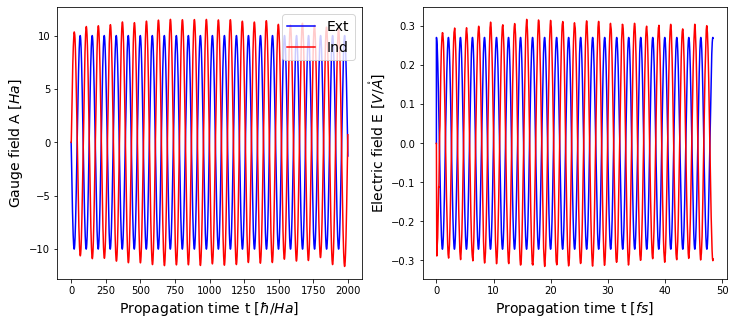

In [27]:
path = "/data117/chen/jupyter/2nonlinearity/au/3000t/"
fs = 14
plt.figure(figsize = (12,5)) 

time = 2000
dt = 0.05 

for a in [10]:
    time_ext, A_ext = cx.ReadData(path + "A%s/laser" % a ,1,2)
    time_ind, A_ind = cx.ReadData(path + "A%s/gauge_field" % a,1,2)  
    
   
    start = 0
    end = int(time/dt)

    time_ext, A_ext = cx.shortten(time_ext, A_ext ,start,end)
    time_ind, A_ind = cx.shortten(time_ind, A_ind ,start,end)
              
    
    E_ext = cx.A2E(time_ext, A_ext)   # V/Angstrom
    E_ind = cx.A2E(time_ind, A_ind)
    
    plt.subplot(1,2,1)
    plt.plot(time_ext, A_ext,color = "blue", label = "Ext")
    plt.plot(time_ind, A_ind,color = "red", label= "Ind")
    plt.legend(fontsize = fs, loc = 1)
    plt.xlabel("Propagation time t [$\hbar/Ha$]", fontsize = fs)
    plt.ylabel("Gauge field A [$Ha$]", fontsize = fs)
        
    plt.subplot(1,2,2)
    plt.plot(time_ext * 0.02419, E_ext, color = "blue")
    plt.plot(time_ind * 0.02419, E_ind, color = "red")
#     plt.legend(fontsize = fs, loc = 1)
    plt.xlabel("Propagation time t [$fs$]", fontsize = fs)
    plt.ylabel("Electric field E [$V/\mathring{A}$]", fontsize = fs)
    

# plt.title("Blue(External laser), Red(Induced gauge)", fontsize = fs)       
plt.show()

In [2]:
# extract the modified I and  real,imaginary part of n.
e0 = cx.Vaccum_permitivity   #[F/m]
c = cx.Light_speed   # [m/s]
def nIcurve(time):
    
    path = "/data117/chen/jupyter/2nonlinearity/au/3000t/"
    Eta = 0.02  # [Ha/hbar]
    wavelength = 630 # [nm]
    omega = cx.Wavelength2Omega(wavelength) * cx.timeau2s  # [1/s] --> 1 / [hbar/Ha]
    I =  []
    n = []
    n_im = []
    e0 = cx.Vaccum_permitivity   #[F/m]
    n0 = 3.18
    dt = 0.05
    
    for a in [10,20,30,40]:
        time_ext, A_ext = cx.ReadData(path + "A%s/laser" % a ,1,2)
        time_ind, A_ind = cx.ReadData(path + "A%s/gauge_field" % a,1,2)
        
        start = 0
        end = int(time/dt)
        
        time_ext, A_ext = cx.shortten(time_ext, A_ext ,start,end)
        time_ind, A_ind = cx.shortten(time_ind, A_ind ,start,end)
              
        dAdt_ext = cx.dA_over_dt(time_ext, A_ext)
        dAdt_ind = cx.dA_over_dt(time_ind, A_ind)

        ext_real, ext_imag = cx.FT(time_ext, dAdt_ext,Eta,omega)
        ind_real, ind_imag = cx.FT(time_ind, dAdt_ind,Eta,omega)
        
        Denominator = np.square(ind_real + ext_real) + np.square(ind_imag + ext_imag)
        epsilon_real = (ext_real * (ind_real + ext_real) + ext_imag * (ind_imag + ext_imag)) / Denominator
        epsilon_imag = (ind_real * ext_imag - ext_real * ind_imag) / Denominator

        n_real, n_imag = cx.refractive_index(epsilon_real, epsilon_imag)

        modification =  epsilon_real
#         modification = np.sqrt(np.square(epsilon_real) + np.square(epsilon_imag))
        Emax = max(cx.A2E(time_ext, A_ext)) / modification  # epsilon modification
#         I_mod = cx.E2I(Emax, n_real)  # [W/cm^2]
        I_mod = cx.E2I(Emax, n_real) * 4  # [W/cm^2]  # cited from the 'n0n2k0k2' paper

    
        I.append(I_mod)
        n.append(n_real)
        n_im.append(n_imag)

#         print("I is %.2e W/cm^2,  epsilon_real is %.4f, epsilon_imag is %.4f,  n_real is %.6f, n_imag is %.6f  "
#               % (I_mod, epsilon_real, epsilon_imag, n_real, n_imag)

    return(I, n,n_im)
#### N-th order polynomial fitting  ##################################
def nfit(x,y,n):
    
    x = np.array(x)
    fitting = np.polyfit(x,y,n)
    parameters = np.poly1d(fitting)
    fitted_y = 0
    for i in range(n+1):
        fitted_y += np.power(x,i) * parameters[i]
        
    return (fitted_y, parameters)
#########################################################################
fs = 14
plt.figure(figsize = (12,5))
fitting_order  =  10
f = open('./3000t/Fitting%s' % fitting_order, 'w')
f.write("#Fitting Order = %s  \n" % fitting_order)
f.write("#pulseDuration[s],  k0,    k2[m^2/W],   n0 ,     n2[m^2/W], chi3r [m^2/V^2],  chi3i [m^2/V^2] \n")

TIME = np.arange(100, 2100, 100)
for time in TIME:
    I, n, n_im  = nIcurve(time)
    ##### Polynomial fitting  ############
    fitted_yr, pr = nfit(I, n, 1)
    fitted_y1, pi = nfit(I, n_im, fitting_order)
    ###########################################################################
    n0 = pr[0]
    n2 = pr[1]*1E-4
    k0 =  pi[0]
    k2 = pi[1]*1E-4
    chi3r = (4 * n0 * e0 * c / 3) * (n0*n2 - k0*k2)
    chi3i = (4 * n0 * e0 * c / 3) * (n0*k2 + k0*n2)
    
    f.write("%.2e            %.2f    %.2e  %.2f      %.2e     %.4e   %.4e\n" 
      % (time * 0.02419 * 1E-15, k0, k2,n0, n2, chi3r, chi3i ))
    print("Time %s finished" % time)
f.close()
#########################################################################
def plotting():
    Num =20
    step = (I[-1] - I[0]) / Num
    Longer_I = np.arange(I[0]-step, I[-1]+2*step,step)
    Longer_k = 0
    for i in range(fitting_order+1):
        Longer_k += np.power(Longer_I,i) * pi[i]
    plt.subplot(1,2,1)
    plt.plot(I, n_im, "o")
    plt.plot(Longer_I, Longer_k,'--', label = "$%sth-fit$" % fitting_order)
    plt.xlabel("Intensity [$W/cm^2$]",fontsize = fs)
    plt.ylabel("$\kappa$",fontsize = fs)
    plt.title("$\kappa_0 = %.2f , \kappa_2 = %.2e m^2/W$" % (k0, k2), fontsize=fs + 2)
    plt.legend(fontsize = fs, loc = 2)



    plt.subplot(1, 2, 2)
    plt.plot(I, n, "o")
    plt.plot(I, fitted_yr, label = "$n_{real} = n_0 + n_2 I$")
    plt.xlabel("Intensity [$W/cm^2$]",fontsize = fs)
    plt.ylabel("$n$",fontsize = fs)
    plt.title("$n_0 = %.2f , n_2 = %.2e m^2/W$" % (n0, n2), fontsize=fs + 2)
    plt.legend(fontsize = fs, loc = 2)
    plt.show()




    



NameError: name 'cx' is not defined

In [4]:
fs = 14
plt.figure(figsize = (12,5))
path = "/data117/chen/jupyter/2nonlinearity/au/3000t/"
for fit in [1]:
    f = np.loadtxt(path+"Fitting%s" % fit)
    t = f[:,0]
    chi3r = f[:,5]
    chi3i = f[:,6]
    
    plt.subplot(1,2,1)
    plt.plot(t,chi3r, label = "%s-fit" % fit)
    plt.legend(fontsize = fs)
    plt.xlabel("Propagation Time [s]",fontsize = fs)
    plt.ylabel("$\chi^{3}_{real} [m^2/V^2]$",fontsize = fs)
    
    plt.subplot(1,2,2)
    plt.plot(t,chi3i, label = "%s-fit" % fit)
    plt.legend(fontsize = fs)
    plt.xlabel("Propagation Time [s]",fontsize = fs)
    plt.ylabel("$\chi^{3}_{imag} [m^2/V^2]$",fontsize = fs)
    
plt.show()
    
    
    
    
    

OSError: /data117/chen/jupyter/2nonlinearity/au/3000t/Fitting1 not found.

<Figure size 864x360 with 0 Axes>